In [1]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
# Enable the cache
fastf1.Cache.enable_cache('cache')
# Load the session data
session = fastf1.get_session(2022, 'Saudi Arabia', 'R')
# Collect all race laps
laps = session.load()
laps = session.laps

core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.2.0-alpha0]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['55', '1', '22', '77', '11', '3', '27', '4', '14', '10', '6', '23', '24', '18', '44', '47', '63', '16', '20', '31']


In [41]:
driver1=laps.pick_driver('LEC').loc[laps.IsAccurate==True]
driver2=laps.pick_driver('VER').loc[laps.IsAccurate==True]
driver3=laps.pick_driver('SAI').loc[laps.IsAccurate==True]
driver4=laps.pick_driver('HAM').loc[laps.IsAccurate==True]
driver5=laps.pick_driver('RUS').loc[laps.IsAccurate==True]

delta1, ref_tel1, compare_tel1 = utils.delta_time(driver1,driver2)
delta2, ref_tel2, compare_tel2 = utils.delta_time(driver1,driver3)
delta3, ref_tel3, compare_tel3 = utils.delta_time(driver1,driver4)
delta4, ref_tel4, compare_tel4 = utils.delta_time(driver1,driver5)

In [42]:
session.event.country

'Bahrain'

In [43]:
delta.cumsum()

0             0.000000
1            -0.000804
2            -0.003289
3            -0.008103
4            -0.015163
             ...      
21499    377439.679223
21500    377442.783674
21501    377445.904540
21502    377449.031656
21503    377452.150195
Name: Time, Length: 21504, dtype: float64

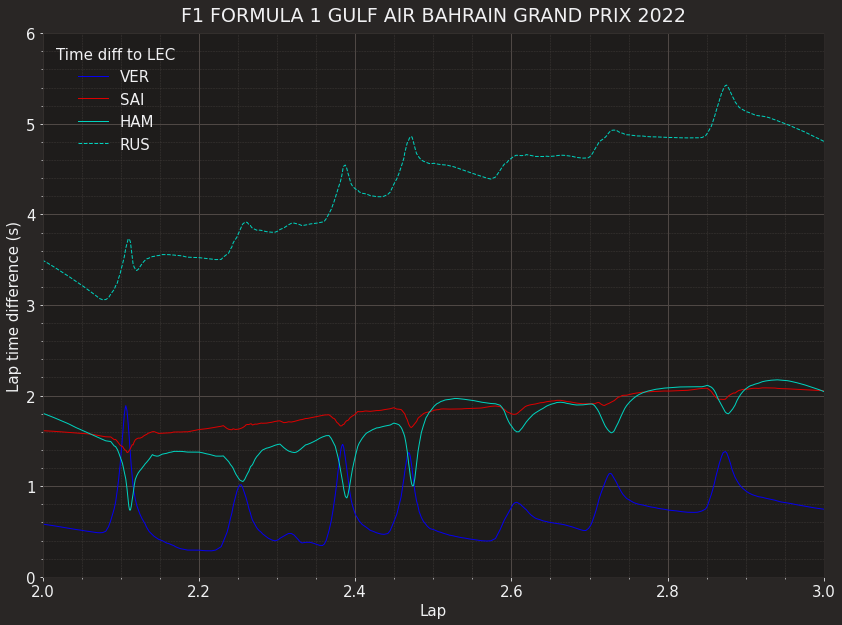

In [53]:
color1 = plotting.team_color(driver2.pick_fastest().Team)
color2 = plotting.team_color(driver3.pick_fastest().Team)
color3 = plotting.team_color(driver4.pick_fastest().Team)
color4 = plotting.team_color(driver5.pick_fastest().Team)

plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(14, 10))
plt.rcParams['font.size'] = '15'
#fig.suptitle(f'{driver1} VS {driver2} lap comparison with soft tyres', fontsize=20)
ax.set_title(f'F1 {session.event.official_event_name}')
ax.plot(ref_tel.Distance/5412, delta1, '-', label=driver2.Driver.unique()[0], color=color1, linewidth=1)
ax.plot(ref_tel.Distance/5412, delta2, '-', label=driver3.Driver.unique()[0], color=color2, linewidth=1)
ax.plot(ref_tel.Distance/5412, delta3, '-', label=driver4.Driver.unique()[0], color=color3, linewidth=1)
ax.plot(ref_tel.Distance/5412, delta4, '--', label=driver5.Driver.unique()[0], color=color4, linewidth=1)
ax.set(ylabel=f'Lap time difference (s)', xlabel=f'Lap')
#plt.gca().invert_yaxis()
plt.xlim(2, 3)
plt.ylim(0, 6)
#ax.set_facecolor('grey')
ax.legend(loc="upper left", facecolor='grey', frameon=False, title=f'Time diff to {driver1.Driver.unique()[0]}')
plt.show()
